In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import textwrap
from adjustText import adjust_text

In [5]:
def search_root_dir(target_folder):
    for parent in Path.cwd().parents:
        if target_folder in os.listdir(parent):
            return parent / target_folder
    return None

# define target folder
target_folder = 'TechnocraticDemocracies'
root_dir = search_root_dir(target_folder)

# set data and output directories
data_dir = root_dir / '01 Raw Data' / 'romelli_cbei_index'
plot_dir = root_dir / '04 Plots'

# print directories
print('Data directory: ', data_dir)
print('Plot directory: ', plot_dir)

# check if they exist; if they do not, create them
if not data_dir.exists():
    print('Data directory does not exist.')

if not plot_dir.exists():
    print('Plot directory does not exist.')
    os.makedirs(plot_dir)

Data directory:  c:\Users\User\OneDrive\Documentos\Papers_Articles_Self\TechnocraticDemocracies\01 Raw Data\romelli_cbei_index
Plot directory:  c:\Users\User\OneDrive\Documentos\Papers_Articles_Self\TechnocraticDemocracies\04 Plots


In [6]:
# import data 
cbie = pd.read_stata(data_dir / 'CBIData_Romelli_2024.dta')

# prune cbie data to OECD countries 
cbie_oecd = cbie[cbie['country'].isin([
    'Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland', 
    'France', 'Germany', 'Greece', 'Ireland', 'Israel', 'Italy', 'Japan', 'Netherlands', 'New Zealand', 'Norway',  
    'Portugal', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 
    'United States of America'
])]

# replace United States of America with United States
cbie_oecd['country'] = cbie_oecd['country'].replace('United States of America', 'United States')

C:\Users\User\AppData\Local\Temp\ipykernel_43872\334340685.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbie_oecd['country'] = cbie_oecd['country'].replace('United States of America', 'United States')


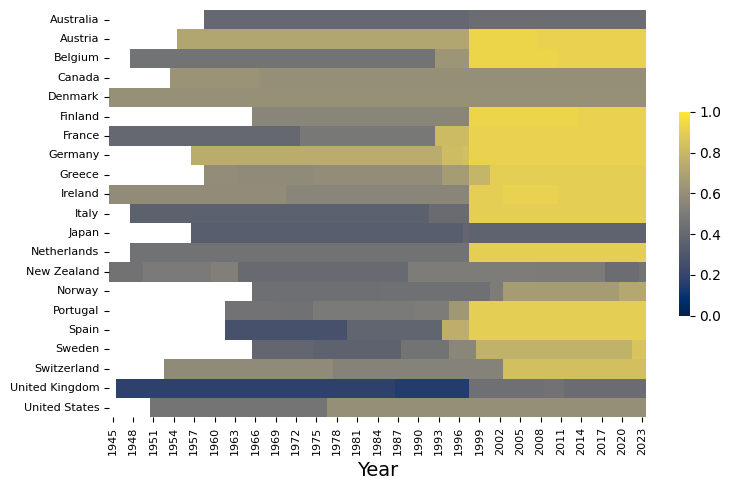

In [7]:
# create a heatmap of cbie_index, with countries on the y-axis and years on the x-axis
cbie_post45 = cbie_oecd[cbie_oecd['year'] >= 1945]
cbie_oecd_pivot = cbie_post45.pivot(index='country', columns='year', values='cbie_index')

#sns.set_theme(style='whitegrid')
# create heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(cbie_oecd_pivot, cmap='cividis', cbar_kws={'shrink': 0.5}, vmin=0, vmax=1)
plt.ylabel('')
plt.xlabel('Year', fontsize = 14)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.tight_layout()
plt.savefig(plot_dir / 'cbie_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

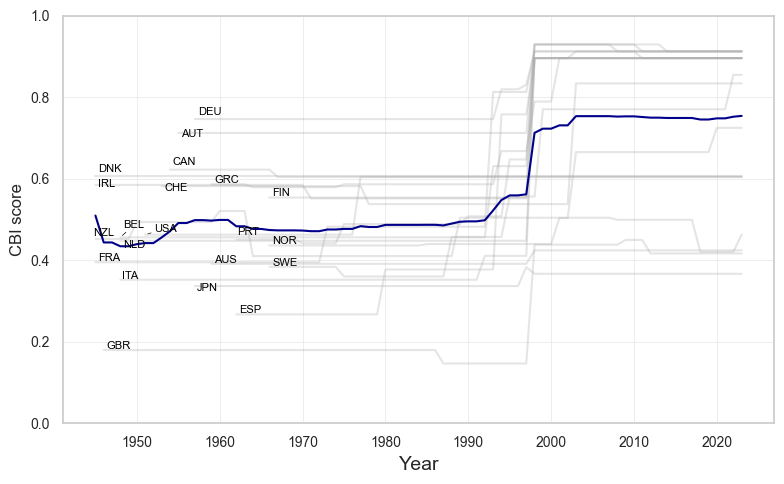

In [8]:
# Set Seaborn style
sns.set_theme(style='whitegrid')

# Create figure
plt.figure(figsize=(8, 5))

# Store last data points for each country
last_points = []

# Plot individual countries in grey and collect their last data points
for country in cbie_post45['iso_a3'].unique():
    country_data = cbie_post45[cbie_post45['iso_a3'] == country]
    sns.lineplot(x='year', y='cbie_index', data=country_data, color='darkgrey', alpha=0.3, errorbar=None)

    # Get last year and corresponding value
    last_year = country_data['year'].min() 
    last_value = country_data.loc[country_data['year'] == last_year, 'cbie_index'].values[-1]

    # Store last data point (to handle overlapping later)
    last_points.append((last_year, last_value, country))

# Sort countries by last value (so we adjust their labels more effectively)
last_points = sorted(last_points, key=lambda x: x[1], reverse=True)

# Store text elements for adjustment
texts = []

# Adjust labels to avoid overlap
for last_year, last_value, country in last_points:
    text = plt.text(last_year, last_value, country, 
                    horizontalalignment='left', fontsize=8, color='black')
    texts.append(text)

# Use adjustText to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='black', lw=0.5))

# Compute the average by year and plot it in dark blue
average_df = cbie_post45.groupby('year')['cbie_index'].mean().reset_index()
sns.lineplot(x='year', y='cbie_index', data=average_df, color='darkblue')

# Grid and styling
plt.grid(True, color='0.9', linewidth=0.5)
plt.ylabel('CBI score')
plt.xlabel('Year', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim((0, 1))
plt.tight_layout()
plt.savefig(plot_dir / 'cbie_lineplot.png', dpi=300, bbox_inches='tight')
plt.show()